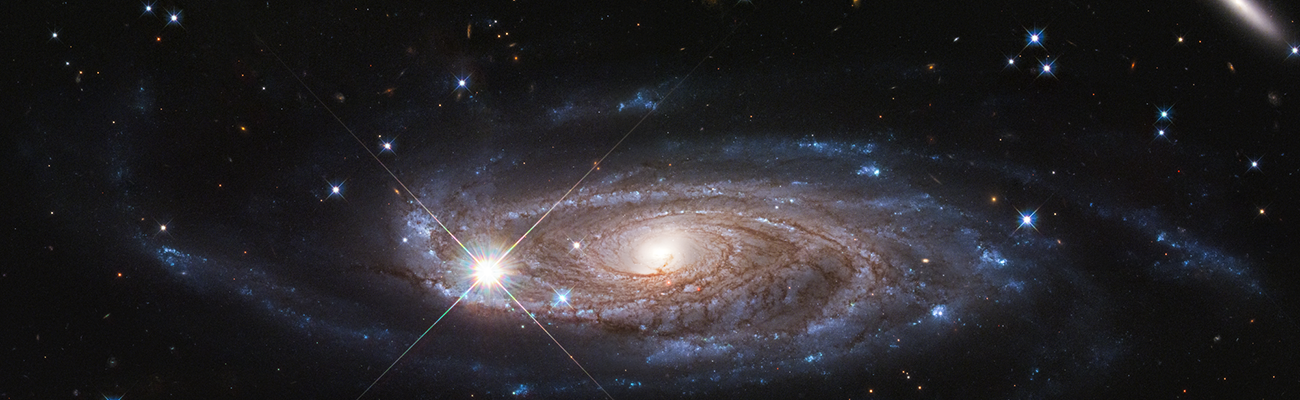

In [13]:
 display(Image(filename='galaxy.png', width = 1300))

<p></p>
<center><b> <big> Astronomy object SED classification </big> </b></center>
<p></p>
<center>graduate work</center>

<center>by Aleksandra Grokhovskaya</center>

<center> Netology, 2021</center>

# Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from IPython.display import Image

# Importing Dataframe

Column description:
    - id					 Unique object ID
    - ra, dec				Coordinates (Right ascension and Declanation, J2000) of objects in degrees 
    - uSDSS and m400-m775	Object magnitude in corresponding filter
    - class 				 Classification of object

In [2]:
df =  pd.read_excel('galaxies.xlsx', na_values = 99.0)
df = df.drop(columns = ['id', 'ra', 'dec'])
df.head(10)

uSDSS    m400    m425    m450    m475    m500    m525    m550    m575  \
0  21.364  21.041  20.745  20.368  20.128  20.044  19.894  19.829  19.707   
1  21.312  20.942  20.660  20.539  20.303  20.092  19.666  19.550  19.299   
2  22.700  22.403  22.784  22.268  21.764  22.034  21.643  21.401  21.360   
3  23.510  22.158  22.740  22.005  22.699  21.662  21.754  21.568  21.728   
4     NaN     NaN  23.981  22.185  22.564  22.193  21.714  21.215  21.340   
5  23.084  22.864     NaN  22.428  22.502  23.114  22.118  21.397  21.870   
6  22.623  22.065  22.111  21.953  21.759  21.284  21.025  21.070  21.037   
7  22.839  22.655  22.032  24.581  21.787  22.051  21.862  22.938  22.043   
8  22.263  22.086  22.038  21.734  21.962  21.331  21.389  21.246  20.662   
9  22.159  21.810  21.921  22.244  22.312  21.891  22.234  23.037  22.113   

     m600    m625    m650    m675    m700    m725    m750    m775  class  
0  19.780  19.492  19.534  19.337  19.388  19.209  19.228  19.024     11  
1  19.266  19.045  18.996  18.907  18.790  18.638  18.754  18.600     10  
2  21.620  21.761  21.590  21.232  21.055  20.791  20.677  20.949     17  
3  21.392  22.333  22.501  21.775  21.461  21.137  21.591  21.022     18  
4  21.079  21.067  20.543  20.627  20.670  20.815  20.470  20.582      0  
5  21.752  22.111  22.537  21.771  21.577  21.509  21.197  20.701     17  
6  21.028  20.955  20.697  20.585  20.588  20.582  20.584  20.690     16  
7  22.862  21.671  21.755  21.738  21.988  21.178  21.302  21.182     17  
8  20.617  20.439  20.187  20.031  20.330  19.789  20.251  19.876     12  
9  22.309  21.486  22.299  21.904  22.546  21.009  21.035  21.422     16

Let's divide objects into basic types: elliptical, spiral, starburst, and quasars. No fine division into subgroups

In [3]:
def new_class(gclass):
    if gclass < 6:
        return 0
    elif (gclass >= 6) & (gclass < 15):
        return 1
    elif (gclass >= 15) & (gclass < 19):
        return 2
    else:
        return 3
        
df['new_class'] = df.apply(lambda x: new_class(x['class']),axis=1)
df = df.drop(columns=['class'], axis=1)
df.head(10)

uSDSS    m400    m425    m450    m475    m500    m525    m550    m575  \
0  21.364  21.041  20.745  20.368  20.128  20.044  19.894  19.829  19.707   
1  21.312  20.942  20.660  20.539  20.303  20.092  19.666  19.550  19.299   
2  22.700  22.403  22.784  22.268  21.764  22.034  21.643  21.401  21.360   
3  23.510  22.158  22.740  22.005  22.699  21.662  21.754  21.568  21.728   
4     NaN     NaN  23.981  22.185  22.564  22.193  21.714  21.215  21.340   
5  23.084  22.864     NaN  22.428  22.502  23.114  22.118  21.397  21.870   
6  22.623  22.065  22.111  21.953  21.759  21.284  21.025  21.070  21.037   
7  22.839  22.655  22.032  24.581  21.787  22.051  21.862  22.938  22.043   
8  22.263  22.086  22.038  21.734  21.962  21.331  21.389  21.246  20.662   
9  22.159  21.810  21.921  22.244  22.312  21.891  22.234  23.037  22.113   

     m600    m625    m650    m675    m700    m725    m750    m775  new_class  
0  19.780  19.492  19.534  19.337  19.388  19.209  19.228  19.024          1  
1  19.266  19.045  18.996  18.907  18.790  18.638  18.754  18.600          1  
2  21.620  21.761  21.590  21.232  21.055  20.791  20.677  20.949          2  
3  21.392  22.333  22.501  21.775  21.461  21.137  21.591  21.022          2  
4  21.079  21.067  20.543  20.627  20.670  20.815  20.470  20.582          0  
5  21.752  22.111  22.537  21.771  21.577  21.509  21.197  20.701          2  
6  21.028  20.955  20.697  20.585  20.588  20.582  20.584  20.690          2  
7  22.862  21.671  21.755  21.738  21.988  21.178  21.302  21.182          2  
8  20.617  20.439  20.187  20.031  20.330  19.789  20.251  19.876          1  
9  22.309  21.486  22.299  21.904  22.546  21.009  21.035  21.422          2

## Visualization of the filters that are used in the corresponding columns (in order from right to left)

In [27]:
files = ['mb400.txt','mb425.txt','mb450.txt','mb475.txt',
        'mb500.txt','mb525.txt','mb550.txt','mb575.txt',
        'mb600.txt','mb625.txt','mb650.txt','mb675.txt',
        'mb700.txt','mb725.txt','mb750.txt','mb775.txt',
        'mb800.txt','mb825.txt','mb850.txt','mb875.txt',
         'u_sdss.txt']
colors = ['#67506c','#8a5897','#684b9d','#374a99',
        '#084b9c','#00777f','#289f3b','#59b136',
        '#accd40','#e3d946','#e3a224','#de5833',
        '#c92722','#a23328','#7d3f30','#362e2b',
        '#181617','#000000','#000000','#000000',
          '#000000','#000000','#000000','#000000']

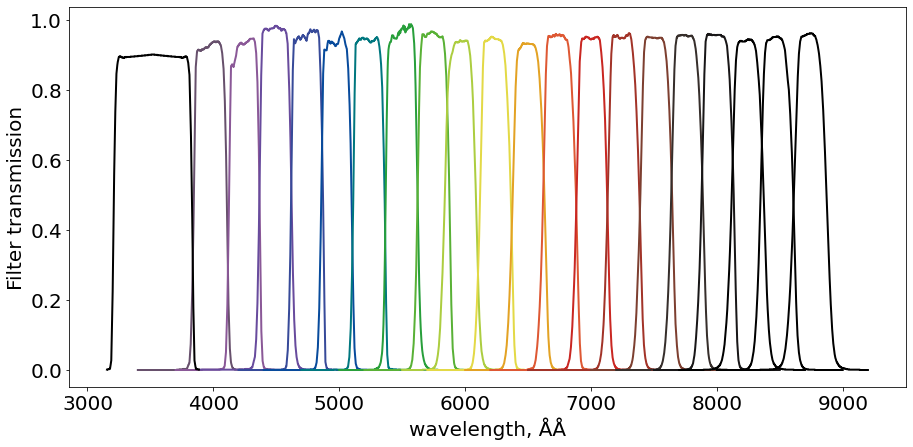

In [32]:
j=0
fig, ax = plt.subplots()
for i in files:
    filt = pd.read_csv(i, sep= "       ", header=None, names = ["wave","flux"], engine='python')
    ax.plot(filt.wave, filt.flux, linewidth = 2, color = colors[j])
    j += 1

ax.set_xlabel('wavelength, ÅÅ')
ax.set_ylabel('Filter transmission')  
fig.set_figwidth(15)
fig.set_figheight(7)
plt.rcParams.update({'font.size': 20})

# Check dataframe the data for missing values

We have missing values for all filter columns:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15664 entries, 0 to 15663
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   uSDSS      13038 non-null  float64
 1   m400       13956 non-null  float64
 2   m425       14346 non-null  float64
 3   m450       14824 non-null  float64
 4   m475       15125 non-null  float64
 5   m500       15286 non-null  float64
 6   m525       15562 non-null  float64
 7   m550       15345 non-null  float64
 8   m575       15572 non-null  float64
 9   m600       15567 non-null  float64
 10  m625       15565 non-null  float64
 11  m650       15554 non-null  float64
 12  m675       15658 non-null  float64
 13  m700       15641 non-null  float64
 14  m725       15533 non-null  float64
 15  m750       15605 non-null  float64
 16  m775       15624 non-null  float64
 17  new_class  15664 non-null  int64  
dtypes: float64(17), int64(1)
memory usage: 2.2 MB


The maximum number of missing values is observed for filters from the blue region of the spectrum:

In [4]:
df_no_na = df.copy(deep=True) #из df_no_na будем удалять NaN
for i in df.columns:
    df[i] = df.groupby('new_class')[i].apply(lambda x: x.fillna(x.mean()))
df.head()

uSDSS       m400    m425    m450    m475    m500    m525    m550  \
0  21.364000  21.041000  20.745  20.368  20.128  20.044  19.894  19.829   
1  21.312000  20.942000  20.660  20.539  20.303  20.092  19.666  19.550   
2  22.700000  22.403000  22.784  22.268  21.764  22.034  21.643  21.401   
3  23.510000  22.158000  22.740  22.005  22.699  21.662  21.754  21.568   
4  23.320872  22.999158  23.981  22.185  22.564  22.193  21.714  21.215   

     m575    m600    m625    m650    m675    m700    m725    m750    m775  \
0  19.707  19.780  19.492  19.534  19.337  19.388  19.209  19.228  19.024   
1  19.299  19.266  19.045  18.996  18.907  18.790  18.638  18.754  18.600   
2  21.360  21.620  21.761  21.590  21.232  21.055  20.791  20.677  20.949   
3  21.728  21.392  22.333  22.501  21.775  21.461  21.137  21.591  21.022   
4  21.340  21.079  21.067  20.543  20.627  20.670  20.815  20.470  20.582   

   new_class  
0          1  
1          1  
2          2  
3          2  
4          0

In [26]:
df_no_na.head()

uSDSS       m400    m425    m450    m475    m500    m525    m550  \
0  21.364000  21.041000  20.745  20.368  20.128  20.044  19.894  19.829   
1  21.312000  20.942000  20.660  20.539  20.303  20.092  19.666  19.550   
2  22.700000  22.403000  22.784  22.268  21.764  22.034  21.643  21.401   
3  23.510000  22.158000  22.740  22.005  22.699  21.662  21.754  21.568   
4  23.320872  22.999158  23.981  22.185  22.564  22.193  21.714  21.215   

     m575    m600    m625    m650    m675    m700    m725    m750    m775  \
0  19.707  19.780  19.492  19.534  19.337  19.388  19.209  19.228  19.024   
1  19.299  19.266  19.045  18.996  18.907  18.790  18.638  18.754  18.600   
2  21.360  21.620  21.761  21.590  21.232  21.055  20.791  20.677  20.949   
3  21.728  21.392  22.333  22.501  21.775  21.461  21.137  21.591  21.022   
4  21.340  21.079  21.067  20.543  20.627  20.670  20.815  20.470  20.582   

   new_class  
0          1  
1          1  
2          2  
3          2  
4          0

Let's try to check how many objects have more than 3 missing value
In first step we add a column with the number of missing values

In [5]:
df_no_na['check_nan'] = df_no_na.isnull().sum(axis = 1)
df_no_na.head()

uSDSS    m400    m425    m450    m475    m500    m525    m550    m575  \
0  21.364  21.041  20.745  20.368  20.128  20.044  19.894  19.829  19.707   
1  21.312  20.942  20.660  20.539  20.303  20.092  19.666  19.550  19.299   
2  22.700  22.403  22.784  22.268  21.764  22.034  21.643  21.401  21.360   
3  23.510  22.158  22.740  22.005  22.699  21.662  21.754  21.568  21.728   
4     NaN     NaN  23.981  22.185  22.564  22.193  21.714  21.215  21.340   

     m600    m625    m650    m675    m700    m725    m750    m775  new_class  \
0  19.780  19.492  19.534  19.337  19.388  19.209  19.228  19.024          1   
1  19.266  19.045  18.996  18.907  18.790  18.638  18.754  18.600          1   
2  21.620  21.761  21.590  21.232  21.055  20.791  20.677  20.949          2   
3  21.392  22.333  22.501  21.775  21.461  21.137  21.591  21.022          2   
4  21.079  21.067  20.543  20.627  20.670  20.815  20.470  20.582          0   

   check_nan  
0          0  
1          0  
2          0  
3          0  
4          2

In [6]:
cols = ['uSDSS','m400','m425','m450','m475','m500','m525','m550','m575','m600','m625','m650','m675','m700','m725','m750','m775']

In [7]:
df_no_na[cols].describe()

uSDSS          m400          m425          m450          m475  \
count  13038.000000  13956.000000  14346.000000  14824.000000  15125.000000   
mean      22.834912     22.617833     22.467352     22.255734     22.070297   
std        1.143755      1.189022      1.204057      1.209879      1.200050   
min       15.597000     15.202000     14.935000     14.682000     14.572000   
25%       22.230000     22.010000     21.876000     21.684000     21.520000   
50%       22.826000     22.631000     22.496000     22.326000     22.175000   
75%       23.488000     23.286000     23.137000     22.923000     22.743000   
max       25.983000     26.110000     26.164000     26.053000     26.045000   

               m500          m525          m550          m575          m600  \
count  15286.000000  15562.000000  15345.000000  15572.000000  15567.000000   
mean      21.890612     21.700745     21.515964     21.315668     21.191309   
std        1.185132      1.139103      1.182392      1.093448      1.097826   
min       14.595000     14.344000     14.271000     14.203000     14.178000   
25%       21.344000     21.169000     20.947000     20.801000     20.674000   
50%       22.024000     21.882500     21.647000     21.512500     21.362000   
75%       22.577750     22.397750     22.194000     22.010000     21.857000   
max       25.936000     26.224000     25.562000     25.410000     25.477000   

               m625          m650          m675          m700          m725  \
count  15565.000000  15554.000000  15658.000000  15641.000000  15533.000000   
mean      21.046180     20.897712     20.784031     20.672122     20.582249   
std        1.076628      1.085723      1.021736      1.045478      1.067300   
min       14.149000     14.165000     14.185000     14.008000     13.930000   
25%       20.540000     20.379000     20.317000     20.182000     20.074000   
50%       21.210000     21.055000     20.983000     20.840000     20.729000   
75%       21.711000     21.555000     21.440000     21.338000     21.229000   
max       25.000000     25.197000     24.886000     26.280000     24.842000   

               m750          m775  
count  15605.000000  15624.000000  
mean      20.493275     20.437025  
std        1.094796      1.075948  
min       14.001000     13.786000  
25%       19.969000     19.917000  
50%       20.647000     20.590000  
75%       21.165000     21.100250  
max       24.924000     28.843000

In [8]:
print('Number of objects with missing value: ',len(df_no_na[df_no_na['check_nan']>0]))

Number of objects with missing value:  5223


In [9]:
#Delete bad objects
df_no_na.drop(df_no_na[df_no_na["check_nan"] > 0].index, inplace=True)
del df_no_na['check_nan']

In [10]:
df_no_na[cols].describe()

uSDSS          m400          m425          m450          m475  \
count  10441.000000  10441.000000  10441.000000  10441.000000  10441.000000   
mean      22.662546     22.358471     22.166273     21.926755     21.727109   
std        1.139589      1.168411      1.172039      1.187504      1.186989   
min       15.597000     15.202000     14.935000     14.682000     14.572000   
25%       22.082000     21.790000     21.612000     21.380000     21.177000   
50%       22.664000     22.399000     22.239000     22.047000     21.876000   
75%       23.294000     23.002000     22.809000     22.608000     22.415000   
max       25.972000     26.110000     26.087000     25.971000     25.892000   

               m500          m525          m550          m575          m600  \
count  10441.000000  10441.000000  10441.000000  10441.000000  10441.000000   
mean      21.538826     21.342585     21.192340     21.000460     20.891821   
std        1.173333      1.139874      1.192692      1.120953      1.126593   
min       14.595000     14.344000     14.271000     14.203000     14.178000   
25%       20.985000     20.790000     20.589000     20.454000     20.335000   
50%       21.702000     21.540000     21.356000     21.213000     21.068000   
75%       22.244000     22.085000     21.912000     21.746000     21.615000   
max       25.936000     26.224000     25.562000     24.765000     25.157000   

               m625          m650          m675          m700          m725  \
count  10441.000000  10441.000000  10441.000000  10441.000000  10441.000000   
mean      20.769456     20.653784     20.542527     20.452999     20.379555   
std        1.118416      1.141304      1.086162      1.114386      1.140000   
min       14.149000     14.165000     14.185000     14.008000     13.930000   
25%       20.209000     20.083000     20.000000     19.906000     19.809000   
50%       20.957000     20.836000     20.745000     20.640000     20.542000   
75%       21.484000     21.379000     21.286000     21.201000     21.114000   
max       24.969000     24.682000     24.886000     25.079000     24.842000   

               m750          m775  
count  10441.000000  10441.000000  
mean      20.306821     20.234304  
std        1.166809      1.148777  
min       14.001000     13.786000  
25%       19.721000     19.656000  
50%       20.511000     20.417000  
75%       21.062000     20.972000  
max       24.924000     28.843000

For m775 column we found that minimum value pretty much deviated from the 75% percentile. Check if it is a single outlier or not.

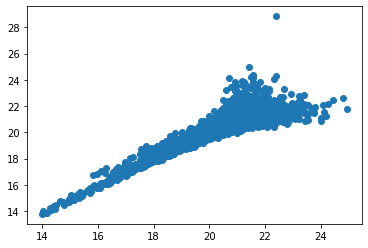

In [11]:
plt.scatter(df_no_na['m750'],df_no_na['m775'])

Yes, it is a single outlier, so drop this object from sample. Repeat nan-values checking

In [12]:
df_no_na = df_no_na[(df_no_na["m775"] < max(df_no_na.m775))]
df_no_na[cols].describe()

uSDSS          m400          m425          m450          m475  \
count  10440.000000  10440.000000  10440.000000  10440.000000  10440.000000   
mean      22.662541     22.358447     22.166308     21.926713     21.726996   
std        1.139643      1.168464      1.172090      1.187553      1.186990   
min       15.597000     15.202000     14.935000     14.682000     14.572000   
25%       22.082000     21.789750     21.612000     21.379750     21.176750   
50%       22.663500     22.399000     22.239500     22.046500     21.876000   
75%       23.294000     23.002000     22.809250     22.608000     22.414250   
max       25.972000     26.110000     26.087000     25.971000     25.892000   

               m500          m525          m550          m575          m600  \
count  10440.000000  10440.000000  10440.000000  10440.000000  10440.000000   
mean      21.538777     21.342516     21.192283     21.000359     20.891677   
std        1.173379      1.139907      1.192735      1.120960      1.126551   
min       14.595000     14.344000     14.271000     14.203000     14.178000   
25%       20.985000     20.789750     20.588750     20.454000     20.335000   
50%       21.702000     21.539500     21.356000     21.212500     21.068000   
75%       22.244250     22.085000     21.912250     21.745250     21.615000   
max       25.936000     26.224000     25.562000     24.765000     25.157000   

               m625          m650          m675          m700          m725  \
count  10440.000000  10440.000000  10440.000000  10440.000000  10440.000000   
mean      20.769245     20.653568     20.542374     20.452929     20.379467   
std        1.118262      1.141145      1.086102      1.114417      1.140019   
min       14.149000     14.165000     14.185000     14.008000     13.930000   
25%       20.209000     20.082750     20.000000     19.905750     19.808750   
50%       20.957000     20.836000     20.745000     20.640000     20.542000   
75%       21.484000     21.379000     21.286000     21.201000     21.113250   
max       24.969000     24.682000     24.886000     25.079000     24.842000   

               m750          m775  
count  10440.000000  10440.000000  
mean      20.306622     20.233479  
std        1.166689      1.145738  
min       14.001000     13.786000  
25%       19.721000     19.656000  
50%       20.510000     20.417000  
75%       21.062000     20.972000  
max       24.924000     25.011000

In [13]:
df_no_na['uSDSS-m425'] = df_no_na['uSDSS'] - df_no_na['m425']
df_no_na['m400-m450'] = df_no_na['m400'] - df_no_na['m450']
df_no_na['m450-m500'] = df_no_na['m450'] - df_no_na['m500']
df_no_na['m500-m550'] = df_no_na['m500'] - df_no_na['m550']
df_no_na['m550-m600'] = df_no_na['m550'] - df_no_na['m600']
df_no_na['m600-m650'] = df_no_na['m600'] - df_no_na['m650']
df_no_na['m650-m700'] = df_no_na['m650'] - df_no_na['m700']
df_no_na['m700-m750'] = df_no_na['m700'] - df_no_na['m750']

We still don't have any filter column without missing values but the data set has become better and has not lost its completeness. We included rows with 3 or more missing values and too faint objects.

# Exploratory Data Analysis

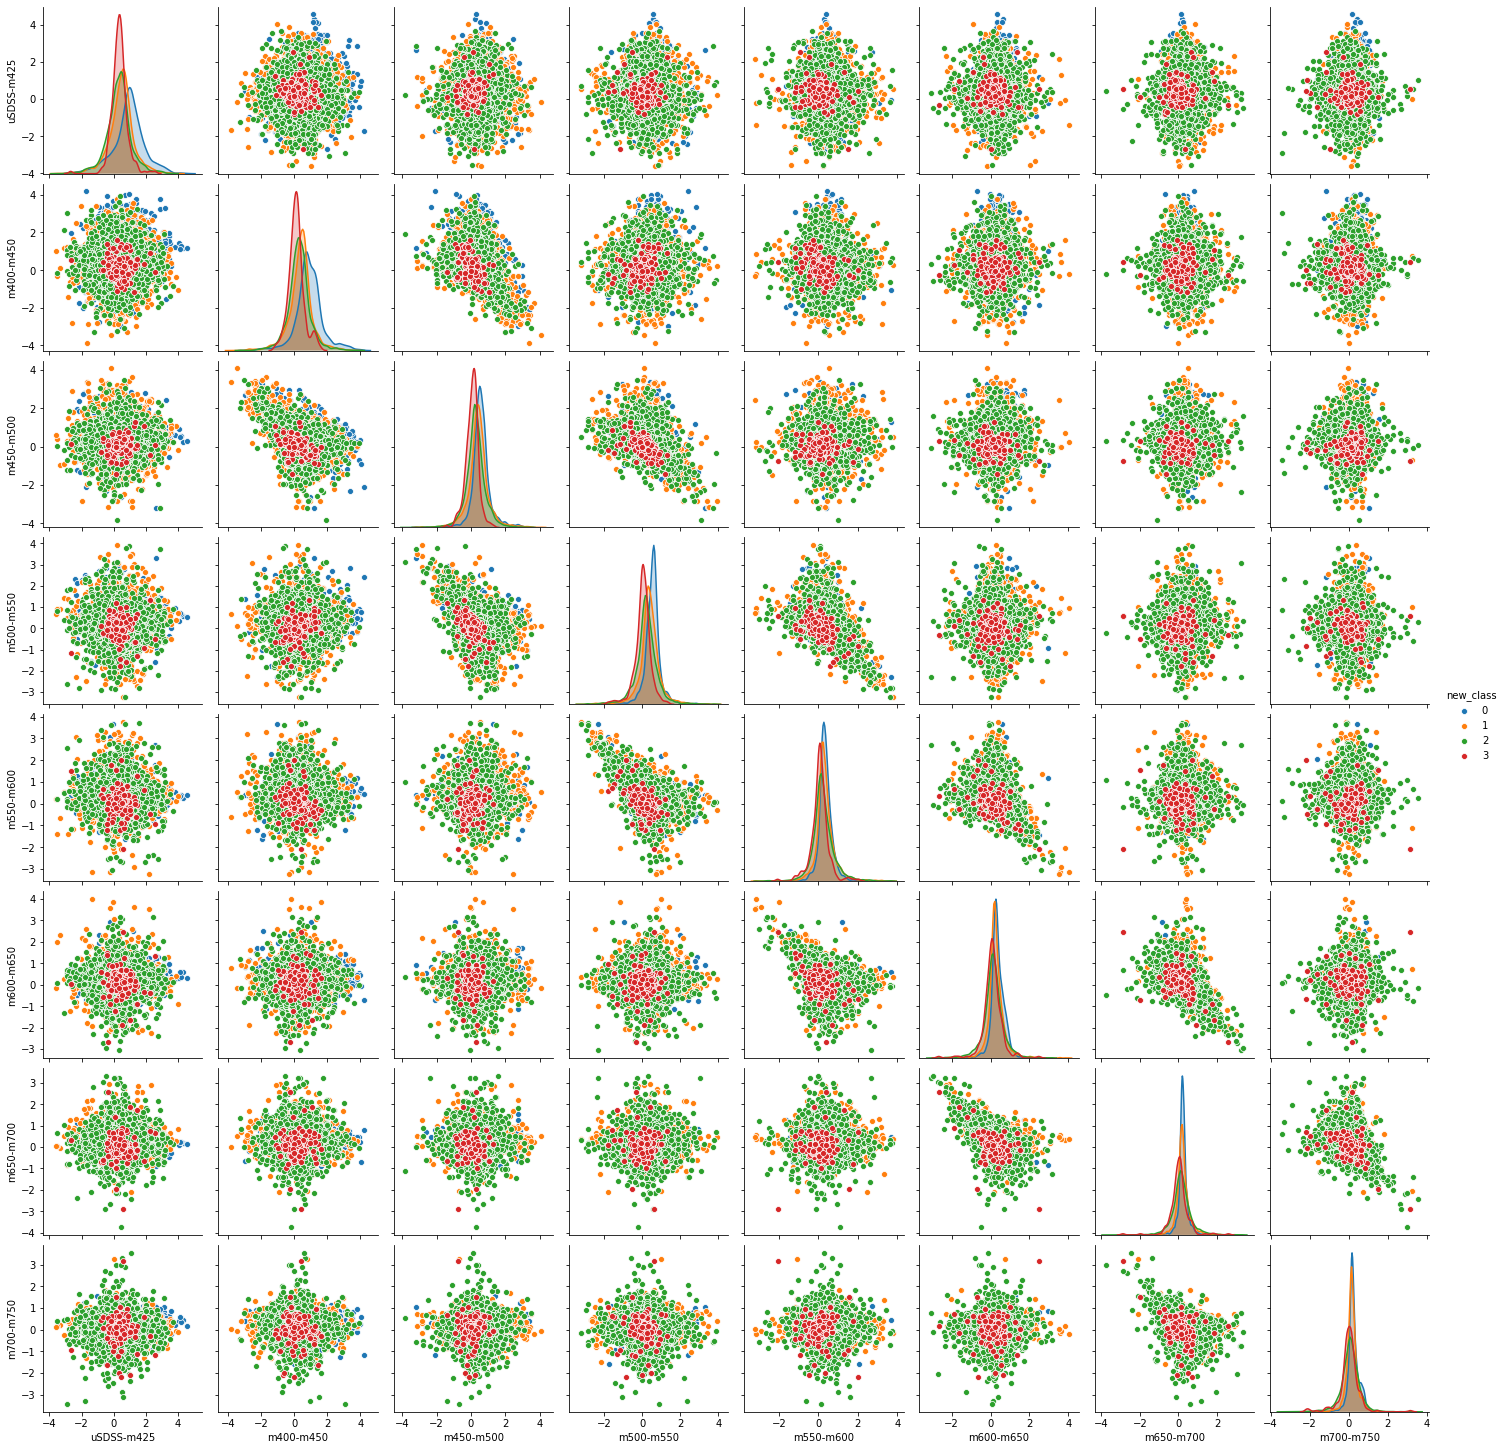

In [14]:
sns.pairplot(df_no_na,
             x_vars=['uSDSS-m425','m400-m450','m450-m500','m500-m550','m550-m600','m600-m650','m650-m700','m700-m750'],
             y_vars=['uSDSS-m425','m400-m450','m450-m500','m500-m550','m550-m600','m600-m650','m650-m700','m700-m750'],
             hue='new_class')

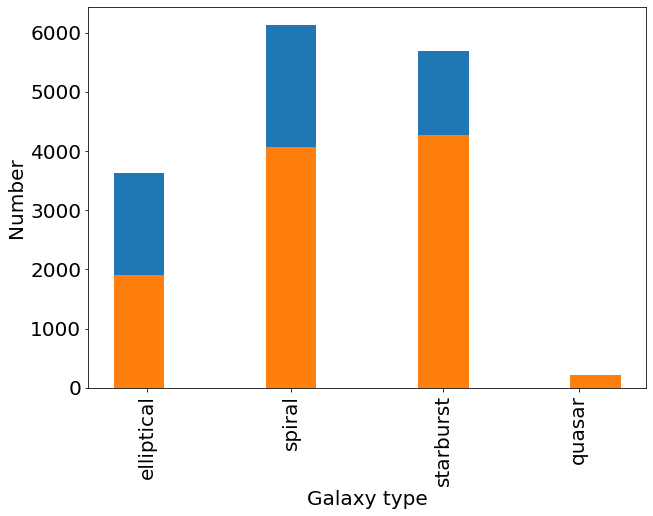

In [30]:
fig, ax = plt.subplots()
plt.hist(df['new_class'])
plt.hist(df_no_na['new_class'])
x_values = [0.2, 1.05, 1.95, 2.75]
x_list = ['elliptical','spiral','starburst','quasar']
plt.xticks(x_values, x_list, rotation='vertical',fontsize=20); plt.yticks(fontsize=20);
plt.ylabel('Number',fontsize=20); plt.xlabel('Galaxy type',fontsize=20); 
fig.set_figwidth(10)
fig.set_figheight(7)

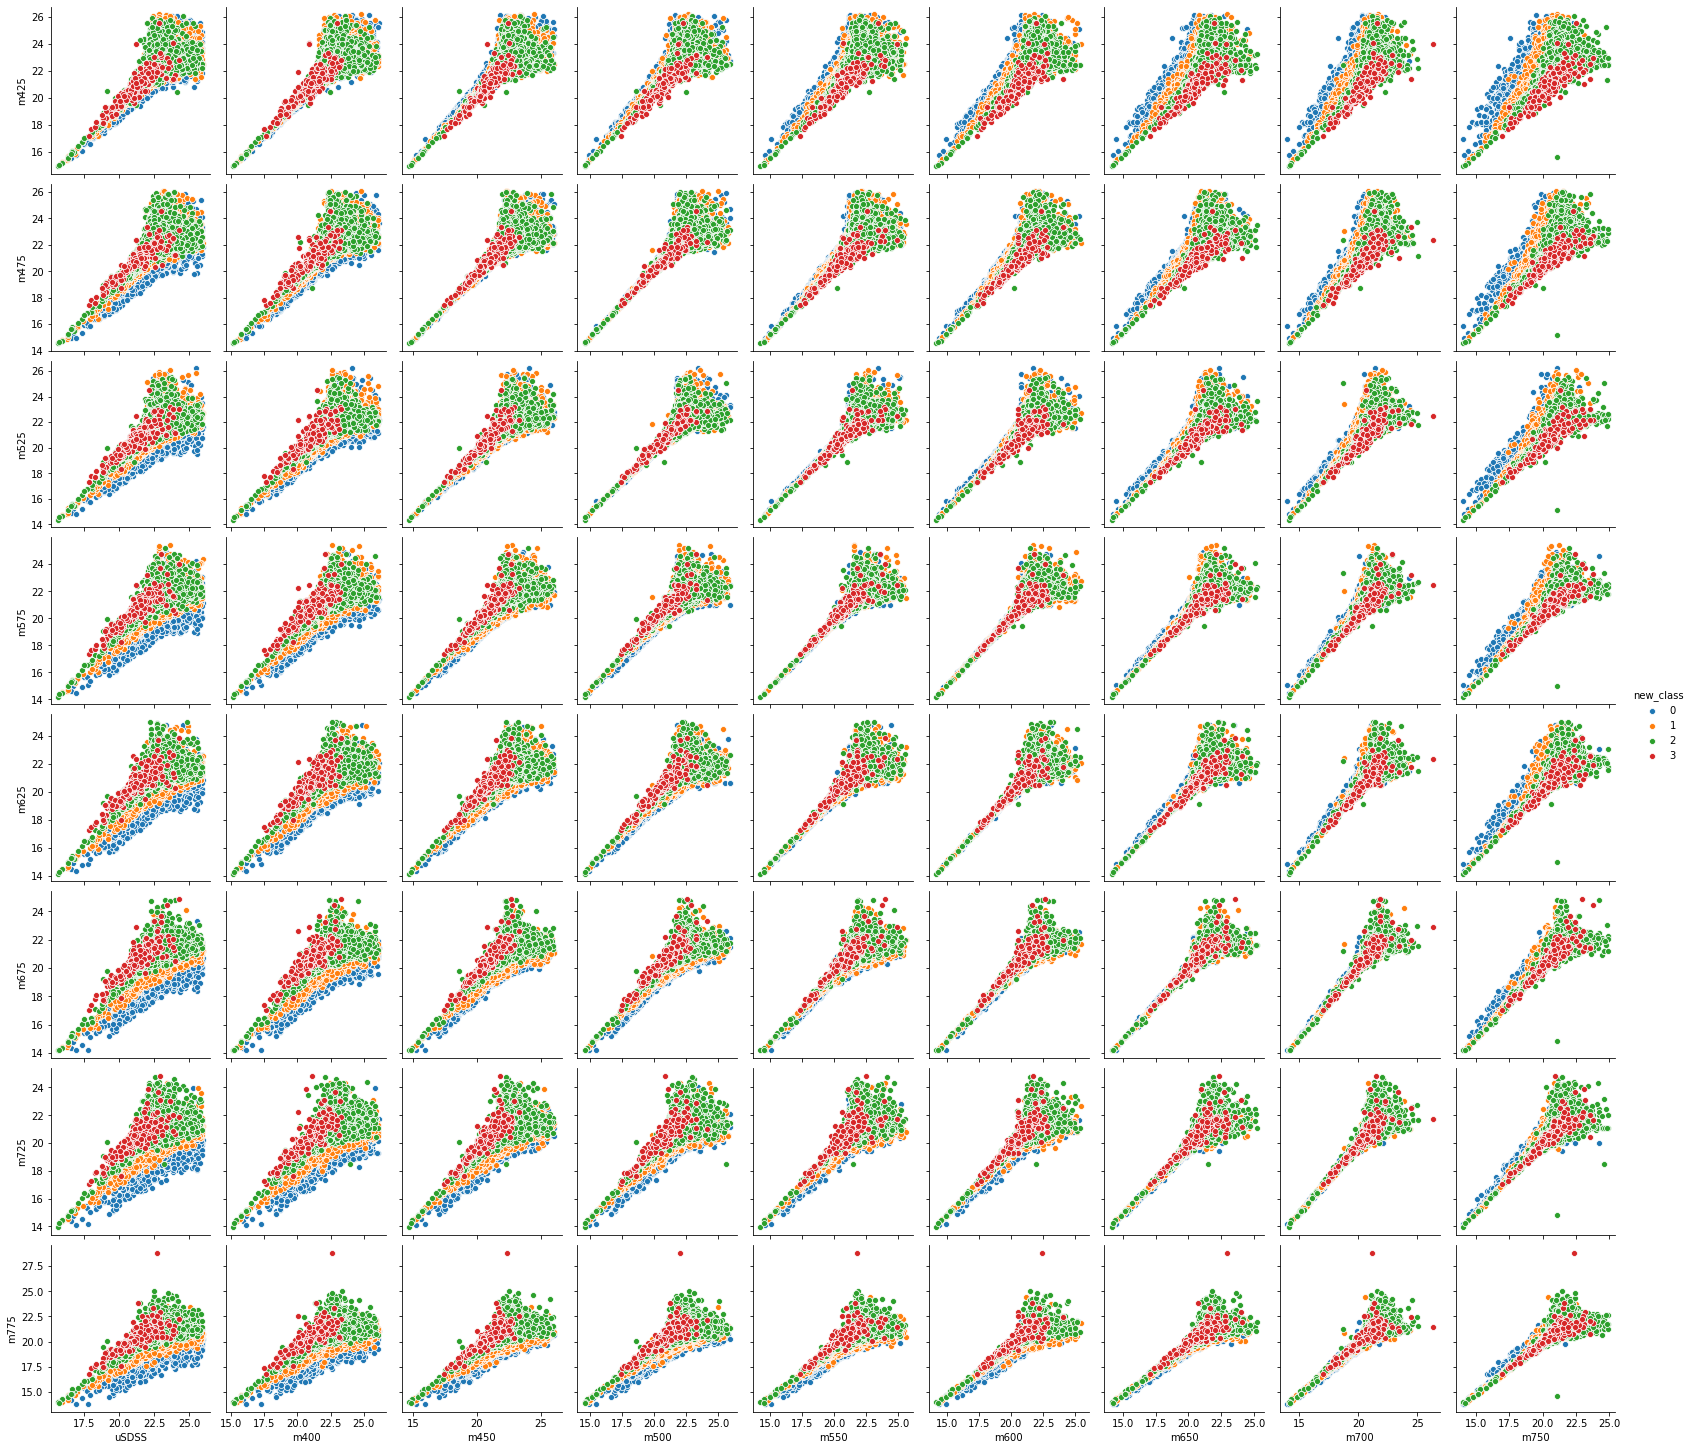

In [19]:
sns.pairplot(df,
             x_vars=['uSDSS','m400','m450','m500','m550','m600','m650','m700','m750'],
             y_vars=['m425','m475','m525','m575','m625','m675','m725','m775'],
             hue='new_class')

Рассмотрим pairplot для набора параметров, который задан выше. Как видно из рисунков, при сравнении синей и красной области спектра галактики начинают разделяться на группы.

Видно, что галатики разделяются по типам, однако, использовать только два параметра будет недостаточным

# Feature Engineering and Selection

Изучим корреляцию, между параметрами. Мы ожидаем увидеть высокую степень корреляции, т.к. оптический спектр объекта изменяется в целом плавно. 

In [22]:
df.corr()

uSDSS      m400      m425      m450      m475      m500  \
uSDSS      1.000000  0.657661  0.652225  0.647907  0.638182  0.630872   
m400       0.657661  1.000000  0.714454  0.704644  0.712415  0.706350   
m425       0.652225  0.714454  1.000000  0.738595  0.746533  0.744227   
m450       0.647907  0.704644  0.738595  1.000000  0.784887  0.785914   
m475       0.638182  0.712415  0.746533  0.784887  1.000000  0.819155   
m500       0.630872  0.706350  0.744227  0.785914  0.819155  1.000000   
m525       0.635932  0.717402  0.759292  0.808199  0.842169  0.859328   
m550       0.584267  0.667055  0.710796  0.763340  0.792591  0.813523   
m575       0.597365  0.680888  0.726781  0.790914  0.822935  0.847003   
m600       0.571520  0.658697  0.707669  0.764195  0.797585  0.819039   
m625       0.553618  0.638065  0.687690  0.751309  0.785971  0.809720   
m650       0.516222  0.599498  0.649107  0.719990  0.750713  0.779909   
m675       0.529137  0.613316  0.666415  0.735500  0.773446  0.801016   
m700       0.494230  0.576837  0.631434  0.701902  0.740696  0.765669   
m725       0.478942  0.553650  0.611607  0.680174  0.717390  0.744239   
m750       0.441221  0.516064  0.572717  0.651091  0.691436  0.716063   
m775       0.459219  0.540918  0.593777  0.667377  0.705085  0.731471   
new_class -0.272794 -0.211406 -0.146048 -0.067365 -0.017611  0.025906   

               m525      m550      m575      m600      m625      m650  \
uSDSS      0.635932  0.584267  0.597365  0.571520  0.553618  0.516222   
m400       0.717402  0.667055  0.680888  0.658697  0.638065  0.599498   
m425       0.759292  0.710796  0.726781  0.707669  0.687690  0.649107   
m450       0.808199  0.763340  0.790914  0.764195  0.751309  0.719990   
m475       0.842169  0.792591  0.822935  0.797585  0.785971  0.750713   
m500       0.859328  0.813523  0.847003  0.819039  0.809720  0.779909   
m525       1.000000  0.859264  0.892749  0.867163  0.858524  0.829657   
m550       0.859264  1.000000  0.865254  0.844859  0.837422  0.817196   
m575       0.892749  0.865254  1.000000  0.894903  0.893250  0.873461   
m600       0.867163  0.844859  0.894903  1.000000  0.885589  0.862867   
m625       0.858524  0.837422  0.893250  0.885589  1.000000  0.875613   
m650       0.829657  0.817196  0.873461  0.862867  0.875613  1.000000   
m675       0.850507  0.838122  0.900497  0.893286  0.911704  0.911781   
m700       0.819351  0.811399  0.870100  0.864642  0.883657  0.893706   
m725       0.793880  0.791021  0.846735  0.843516  0.861734  0.874922   
m750       0.768713  0.768384  0.830892  0.818082  0.841415  0.868751   
m775       0.785684  0.780300  0.845014  0.837724  0.859280  0.878845   
new_class  0.072921  0.137478  0.183602  0.207994  0.253311  0.314123   

               m675      m700      m725      m750      m775  new_class  
uSDSS      0.529137  0.494230  0.478942  0.441221  0.459219  -0.272794  
m400       0.613316  0.576837  0.553650  0.516064  0.540918  -0.211406  
m425       0.666415  0.631434  0.611607  0.572717  0.593777  -0.146048  
m450       0.735500  0.701902  0.680174  0.651091  0.667377  -0.067365  
m475       0.773446  0.740696  0.717390  0.691436  0.705085  -0.017611  
m500       0.801016  0.765669  0.744239  0.716063  0.731471   0.025906  
m525       0.850507  0.819351  0.793880  0.768713  0.785684   0.072921  
m550       0.838122  0.811399  0.791021  0.768384  0.780300   0.137478  
m575       0.900497  0.870100  0.846735  0.830892  0.845014   0.183602  
m600       0.893286  0.864642  0.843516  0.818082  0.837724   0.207994  
m625       0.911704  0.883657  0.861734  0.841415  0.859280   0.253311  
m650       0.911781  0.893706  0.874922  0.868751  0.878845   0.314123  
m675       1.000000  0.933444  0.911700  0.900507  0.914237   0.337415  
m700       0.933444  1.000000  0.908224  0.905081  0.909817   0.376813  
m725       0.911700  0.908224  1.000000  0.890011  0.893432   0.384457  
m750       0.900507  0.905081  0.890011  1.000000  0.906269   0.430372

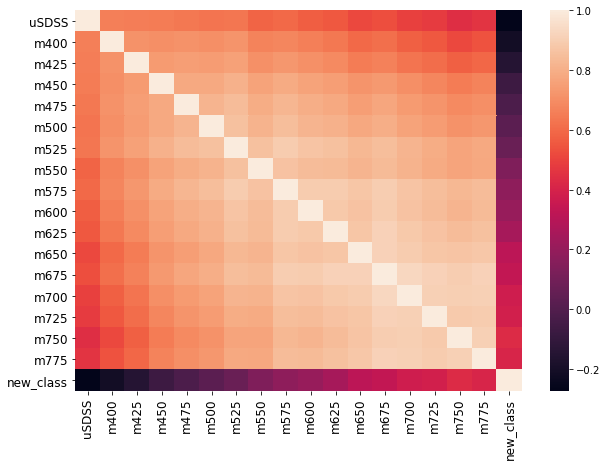

In [25]:
fig, ax = plt.subplots()
sns.heatmap(df.corr())
fig.set_figwidth(10)
fig.set_figheight(7)
plt.xticks(fontsize=12);
plt.yticks(fontsize=12);

# Evaluating the model

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

In [16]:
df_no_na.columns

Index(['uSDSS', 'm400', 'm425', 'm450', 'm475', 'm500', 'm525', 'm550', 'm575',
       'm600', 'm625', 'm650', 'm675', 'm700', 'm725', 'm750', 'm775',
       'new_class', 'uSDSS-m425', 'm400-m450', 'm450-m500', 'm500-m550',
       'm550-m600', 'm600-m650', 'm650-m700', 'm700-m750'],
      dtype='object')

In [17]:
#удаляем столбцы с координатами и id, от них тип объекта зависитть не может
X = df_no_na.drop(columns=['new_class'], axis=1) 
Y = df_no_na['new_class']
X.columns

Index(['uSDSS', 'm400', 'm425', 'm450', 'm475', 'm500', 'm525', 'm550', 'm575',
       'm600', 'm625', 'm650', 'm675', 'm700', 'm725', 'm750', 'm775',
       'uSDSS-m425', 'm400-m450', 'm450-m500', 'm500-m550', 'm550-m600',
       'm600-m650', 'm650-m700', 'm700-m750'],
      dtype='object')

In [18]:
X_train,X_test,Y_train,Y_test = train_test_split(np.array(X), np.array(Y), test_size=0.2, 
                                                 random_state=42, stratify=np.array(Y))

# Random forest classifier

In [19]:
rfc = RandomForestClassifier()
rfc.fit(X_train, Y_train)
pred = rfc.predict(X_test)

In [20]:
acc_no_na=accuracy_score(Y_test,pred)
print('Accuracy:', round(acc_no_na*100, 2), '%.')

Accuracy: 79.02 %.


Accuracy score is much better than for a small class of objects

In [21]:
print(classification_report(rfc.predict(X_test), Y_test))  

              precision    recall  f1-score   support

           0       0.71      0.90      0.80       302
           1       0.76      0.77      0.77       794
           2       0.89      0.77      0.83       977
           3       0.19      0.53      0.28        15

    accuracy                           0.79      2088
   macro avg       0.64      0.75      0.67      2088
weighted avg       0.81      0.79      0.79      2088



## Add more data

In [17]:
X = df.drop(columns=['new_class'], axis=1) 
Y = df['new_class']
X.shape

(15664, 17)

In [18]:
X_train,X_test,Y_train,Y_test = train_test_split(np.array(X), np.array(Y), test_size=0.2, 
                                                 random_state=42, stratify=np.array(Y))

In [19]:
rfc = RandomForestClassifier()
rfc.fit(X_train, Y_train)
pred = rfc.predict(X_test)

acc_init=accuracy_score(Y_test,pred)
print('Accuracy:', round(acc_init*100, 2), '%.')

Accuracy: 81.49 %.


In [20]:
print(classification_report(rfc.predict(X_test), Y_test))  

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       676
           1       0.79      0.79      0.79      1238
           2       0.85      0.81      0.83      1193
           3       0.41      0.69      0.51        26

    accuracy                           0.81      3133
   macro avg       0.72      0.79      0.75      3133
weighted avg       0.82      0.81      0.82      3133



 ## Feature Importances

In [26]:
feature_list = list(X.columns)

importances = list(rfc.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: uSDSS                Importance: 0.08
Variable: m750                 Importance: 0.08
Variable: m400                 Importance: 0.07
Variable: m775                 Importance: 0.07
Variable: m425                 Importance: 0.05
Variable: m725                 Importance: 0.05
Variable: uSDSS-m425           Importance: 0.05
Variable: m400-m450            Importance: 0.05
Variable: m450                 Importance: 0.04
Variable: m675                 Importance: 0.04
Variable: m700                 Importance: 0.04
Variable: m500-m550            Importance: 0.04
Variable: m475                 Importance: 0.03
Variable: m500                 Importance: 0.03
Variable: m575                 Importance: 0.03
Variable: m625                 Importance: 0.03
Variable: m650                 Importance: 0.03
Variable: m450-m500            Importance: 0.03
Variable: m600-m650            Importance: 0.03
Variable: m525                 Importance: 0.02
Variable: m550                 Importanc

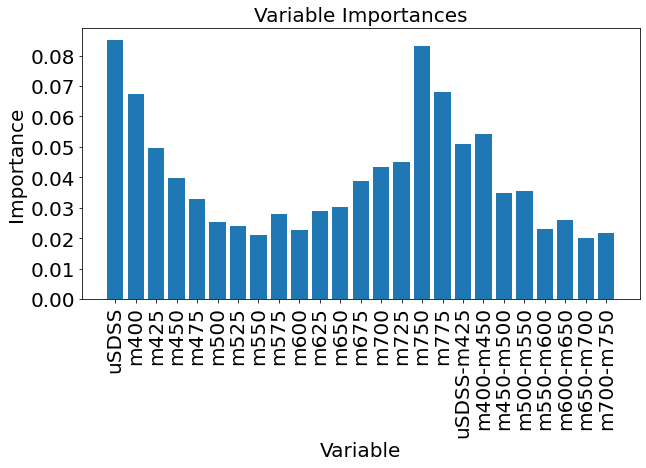

In [27]:
fig, ax = plt.subplots()
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical', linewidth = 1.2)
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance',fontsize=20); plt.xlabel('Variable',fontsize=20); plt.title('Variable Importances',fontsize=20);
fig.set_figwidth(10)
fig.set_figheight(5)
plt.xticks(fontsize=20);
plt.yticks(fontsize=20);

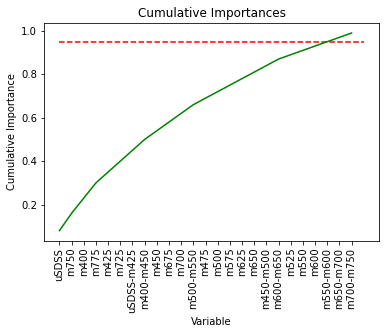

In [28]:
# List of features sorted from most to least important
sorted_importances = [importance[1] for importance in feature_importances]
sorted_features = [importance[0] for importance in feature_importances]
# Cumulative importances
cumulative_importances = np.cumsum(sorted_importances)
# Make a line graph
plt.plot(x_values, cumulative_importances, 'g-')
# Draw line at 95% of importance retained
plt.hlines(y = 0.95, xmin=0, xmax=len(sorted_importances), color = 'r', linestyles = 'dashed')
# Format x ticks and labels
plt.xticks(x_values, sorted_features, rotation = 'vertical')
# Axis labels and title
plt.xlabel('Variable'); plt.ylabel('Cumulative Importance'); plt.title('Cumulative Importances');

In [29]:
# Find number of features for cumulative importance of 95%
# Add 1 because Python is zero-indexed
print('Number of features for 95% importance:', np.where(cumulative_importances > 0.95)[0][0] + 1)

Number of features for 95% importance: 23


In [25]:
# Extract the names of the most important features
important_feature_names = [feature[0] for feature in feature_importances[0:15]]
# Find the columns of the most important features
important_indices = [feature_list.index(feature) for feature in important_feature_names]
# Create training and testing sets with only the important features
important_X_train = X_train[:, important_indices]
important_X_test = X_test[:, important_indices]
# Sanity check on operations
print('Important train features shape:', important_X_train.shape)
print('Important test features shape:', important_X_test.shape)

Important train features shape: (12531, 15)
Important test features shape: (3133, 15)


## Training and Evaluating on Important Features

In [26]:
rfc = RandomForestClassifier()
rfc.fit(important_X_train, Y_train)
pred = rfc.predict(important_X_test)

In [27]:
acc_feat_imp=accuracy_score(Y_test,rfc.predict(important_X_test))
print('Accuracy:', round(acc_feat_imp*100, 2), '%.')

Accuracy: 81.36 %.


In [28]:
print(classification_report(rfc.predict(important_X_test), Y_test)) 

              precision    recall  f1-score   support

           0       0.82      0.89      0.86       670
           1       0.80      0.78      0.79      1252
           2       0.84      0.81      0.82      1185
           3       0.36      0.62      0.46        26

    accuracy                           0.81      3133
   macro avg       0.71      0.77      0.73      3133
weighted avg       0.82      0.81      0.81      3133



(-0.5, 3.5)

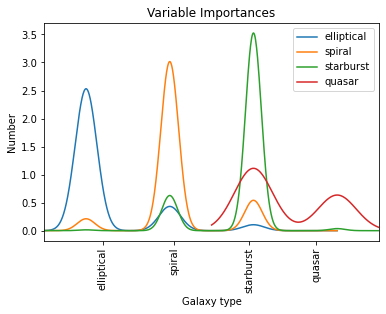

In [31]:
d = {'pred': rfc.predict(important_X_test), 'test':Y_test}
res = pd.DataFrame(data=d)
for i in range(4):
    res_ = res[res["test"] == i]
    res_['pred'].plot.kde()
    plt.xticks(x_values, x_list, rotation='vertical')

plt.ylabel('Number'); plt.xlabel('Galaxy type'); plt.title('Variable Importances');
plt.legend(x_list)
plt.xlim(-0.5,3.5)  

## Random Hyperparameter Grid

In [61]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', None]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', None], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [62]:
# Use the random grid to search for best hyperparameters

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rfc_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, n_iter = 100, 
                                cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rfc_random.fit(important_X_train, Y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 19.1min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 89.2min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 161.9min finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [63]:
rfc_random.best_params_

{'n_estimators': 1400,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 40,
 'bootstrap': False}

In [34]:
rfc1=RandomForestClassifier(n_estimators= 1400,
 min_samples_split= 2,
 min_samples_leaf= 1,
 max_features= 'auto',
 max_depth= 40,
 bootstrap= True)

rfc1.fit(X_train, Y_train)

pred=rfc1.predict(X_test)

acc_rand = accuracy_score(Y_test,pred)

print("Accuracy for Random Forest on CV data: ", (acc_rand-acc_feat_imp)/acc_feat_imp)

Accuracy for Random Forest on CV data:  0.01412318556296582


In [36]:
print(classification_report(pred, Y_test)) 

              precision    recall  f1-score   support

           0       0.84      0.90      0.87       675
           1       0.80      0.80      0.80      1227
           2       0.85      0.81      0.83      1203
           3       0.43      0.68      0.53        28

    accuracy                           0.83      3133
   macro avg       0.73      0.80      0.76      3133
weighted avg       0.83      0.83      0.83      3133



(-0.5, 3.5)

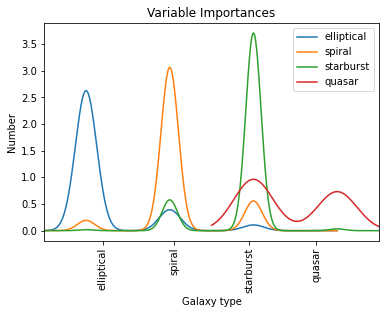

In [38]:
d = {'pred': rfc1.predict(X_test), 'test':Y_test}
res = pd.DataFrame(data=d)
for i in range(4):
    res_ = res[res["test"] == i]
    res_['pred'].plot.kde()
    plt.xticks(x_values, x_list, rotation='vertical')

plt.ylabel('Number'); plt.xlabel('Galaxy type'); plt.title('Variable Importances');
plt.legend(x_list)
plt.xlim(-0.5,3.5)

## Grid Search with Cross Validation

In [67]:
#We can use a grid search to find the best parameters for this model. Lets try
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [40, 50, 60],
    'max_features': [4, 5],
    'min_samples_leaf': [1, 2],
    'min_samples_split': [1, 2, 3],
    'n_estimators': [1300, 1400, 1500]
}

# Create a based model
rfc2 = RandomForestClassifier()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rfc2, param_grid = param_grid, 
                           scoring = 'neg_mean_absolute_error', cv = 3, 
                           n_jobs = -1, verbose = 2)

In [68]:
grid_search.fit(important_X_train, Y_train)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 30.0min
[Parallel(n_jobs=-1)]: Done 324 out of 324 | elapsed: 64.3min finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [40, 50, 60],
                         'max_features': [4, 5], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [1, 2, 3],
                         'n_estimators': [1300, 1400, 1500]},
             scoring='neg_mean_absolute_error', verbose=2)

In [69]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 40,
 'max_features': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 1400}

In [39]:
rfc2=RandomForestClassifier(n_estimators= 1400,
 min_samples_split= 3,
 min_samples_leaf= 1,
 max_features= 5,
 max_depth= 40,
 bootstrap= True)

rfc2.fit(X_train, Y_train)

pred=rfc2.predict(X_test)

acc_greed = accuracy_score(Y_test,pred)

print("Accuracy for Random Forest on CV data: ", (acc_greed -acc_init)/acc_init)

Accuracy for Random Forest on CV data:  0.006658832745789244


In [40]:
print(classification_report(pred, Y_test)) 

              precision    recall  f1-score   support

           0       0.84      0.89      0.87       682
           1       0.80      0.80      0.80      1230
           2       0.85      0.81      0.83      1191
           3       0.43      0.63      0.51        30

    accuracy                           0.82      3133
   macro avg       0.73      0.78      0.75      3133
weighted avg       0.82      0.82      0.82      3133



# K-nearest neighbors classifier

In [72]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [73]:
KNN_model = KNeighborsClassifier()  
KNN_model.fit(X_train, Y_train)
KNN_prediction = KNN_model.predict(X_test)
acc_knn = accuracy_score(Y_test, KNN_prediction)
print("K-Nearest Neighbors: ", acc_knn)

K-Nearest Neighbors:  0.7264602617299712


## Re-scaling Features

In [78]:
#Create copy of dataset.
df_model = df_no_na.copy(deep=True)
#Rescaling features age, trestbps, chol, thalach, oldpeak.
scaler = StandardScaler()
for feature in feature_list:
    df_model[feature_list] = scaler.fit_transform(df_model[feature_list])
#Create KNN Object
knn = KNeighborsClassifier()
#Create x and y variable
x = df_model.drop(columns=['new_class'])
y = df_model['new_class']
#Split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
#Training the model
knn.fit(x_train, y_train)
#Predict testing set
y_pred = knn.predict(x_test)
#Check performance using accuracy
print(accuracy_score(y_test, y_pred))
#Check performance using roc
# roc_auc_score(y_test, y_pred)

0.7705938697318008


In [80]:
from sklearn.preprocessing import RobustScaler

#Create copy of dataset.
df_model = df_no_na.copy()
#Rescaling features age, trestbps, chol, thalach, oldpeak.
scaler = RobustScaler()
for feature in feature_list:
    df_model[feature_list] = scaler.fit_transform(df_model[feature_list])
#Create KNN Object
knn = KNeighborsClassifier()
#Create x and y variable
x = df_model.drop(columns=['new_class'])
y = df_model['new_class']
#Split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
#Training the model
knn.fit(x_train, y_train)
#Predict testing set
y_pred = knn.predict(x_test)
#Check performance using accuracy
print(accuracy_score(y_test, y_pred))

0.7729885057471264


In [82]:
from sklearn.preprocessing import MinMaxScaler

#Create copy of dataset.
df_model = df_no_na.copy()
#Rescaling features age, trestbps, chol, thalach, oldpeak.
scaler = MinMaxScaler()
for feature in feature_list:
    df_model[feature_list] = scaler.fit_transform(df_model[feature_list])
#Create KNN Object
knn = KNeighborsClassifier()
#Create x and y variable
x = df_model.drop(columns=['new_class'])
y = df_model['new_class']
#Split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
#Training the model
knn.fit(x_train, y_train)
#Predict testing set
y_pred = knn.predict(x_test)
#Check performance using accuracy
print(accuracy_score(y_test, y_pred))

0.7701149425287356


## Improve parameters for KNN model

In [83]:
#List Hyperparameters that we want to tune.
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
#Convert to dictionary
param_grid = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(estimator = knn2, param_grid = param_grid,
                   scoring = 'neg_mean_absolute_error', cv=3, 
                   n_jobs = -1, verbose = 2)
#Fit the model
best_model = clf.fit(X_train, Y_train)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Fitting 3 folds for each of 2842 candidates, totalling 8526 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   48.4s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed: 10.3min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed: 15.5min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed: 20.9min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed: 26.8min
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed: 32.6min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed: 39.3min
[Parallel(n_jobs=-1)]: Done 3273 tasks      | elapsed: 46.1min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed: 53.4min
[Parallel(n_jobs=-1)]: Done 4893 tasks      | elapsed: 61.4min
[Parallel(n_jobs=-1)]: Done 5824 tasks      | elapsed: 70.1min
[Parallel(n_jobs=-1)]: Done 6837 tasks      | elapsed: 79.1min
[Parallel(n_jobs=-1)]: Done 7930 tasks      | elapsed: 88.9min
[Parallel(n_jobs=-1)]: Done 8526 out of 8526 |

Best leaf_size: 1
Best p: 1
Best n_neighbors: 18


In [84]:
KNN_model = KNeighborsClassifier(n_neighbors=18, leaf_size=1, p=1)  
KNN_model.fit(X_train, Y_train)
KNN_prediction = KNN_model.predict(X_test)
acc_knn2 = accuracy_score(Y_test, KNN_prediction)
print("K-Nearest Neighbors: ", (acc_knn2-acc_knn)/acc_knn)

K-Nearest Neighbors:  0.057996485061511525


In [85]:
acc_knn2

0.7685924034471753

The best parameters do not greatly improve model accuracy